In [2]:
from Binaries import *

In [3]:
q_peak = np.array([GLOBAL.q_peak for _ in range(3)])
q_charge = np.array([GLOBAL.q_charge for _ in range(3)])

EventsADC = EventGenerator(["19_19.5"], real_background = False, sigma = 0, split = 1, apply_downsampling = False, floor_trace = False)
EventsADC.files = ["/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC/" + file for file in os.listdir("/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC")]

q_peak = np.array([1, 1, 1])
q_charge = np.array([GLOBAL.q_charge / GLOBAL.q_peak for _ in range(3)])

EventsVEM = EventGenerator(["19_19.5"], real_background = False, sigma = 0, split = 1, q_peak = q_peak, q_charge = q_charge, apply_downsampling = False, floor_trace = False)
EventsVEM.files = ["/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM/" + file for file in os.listdir("/cr/tempdata01/filip/QGSJET-II/COMPARE/VEM")]

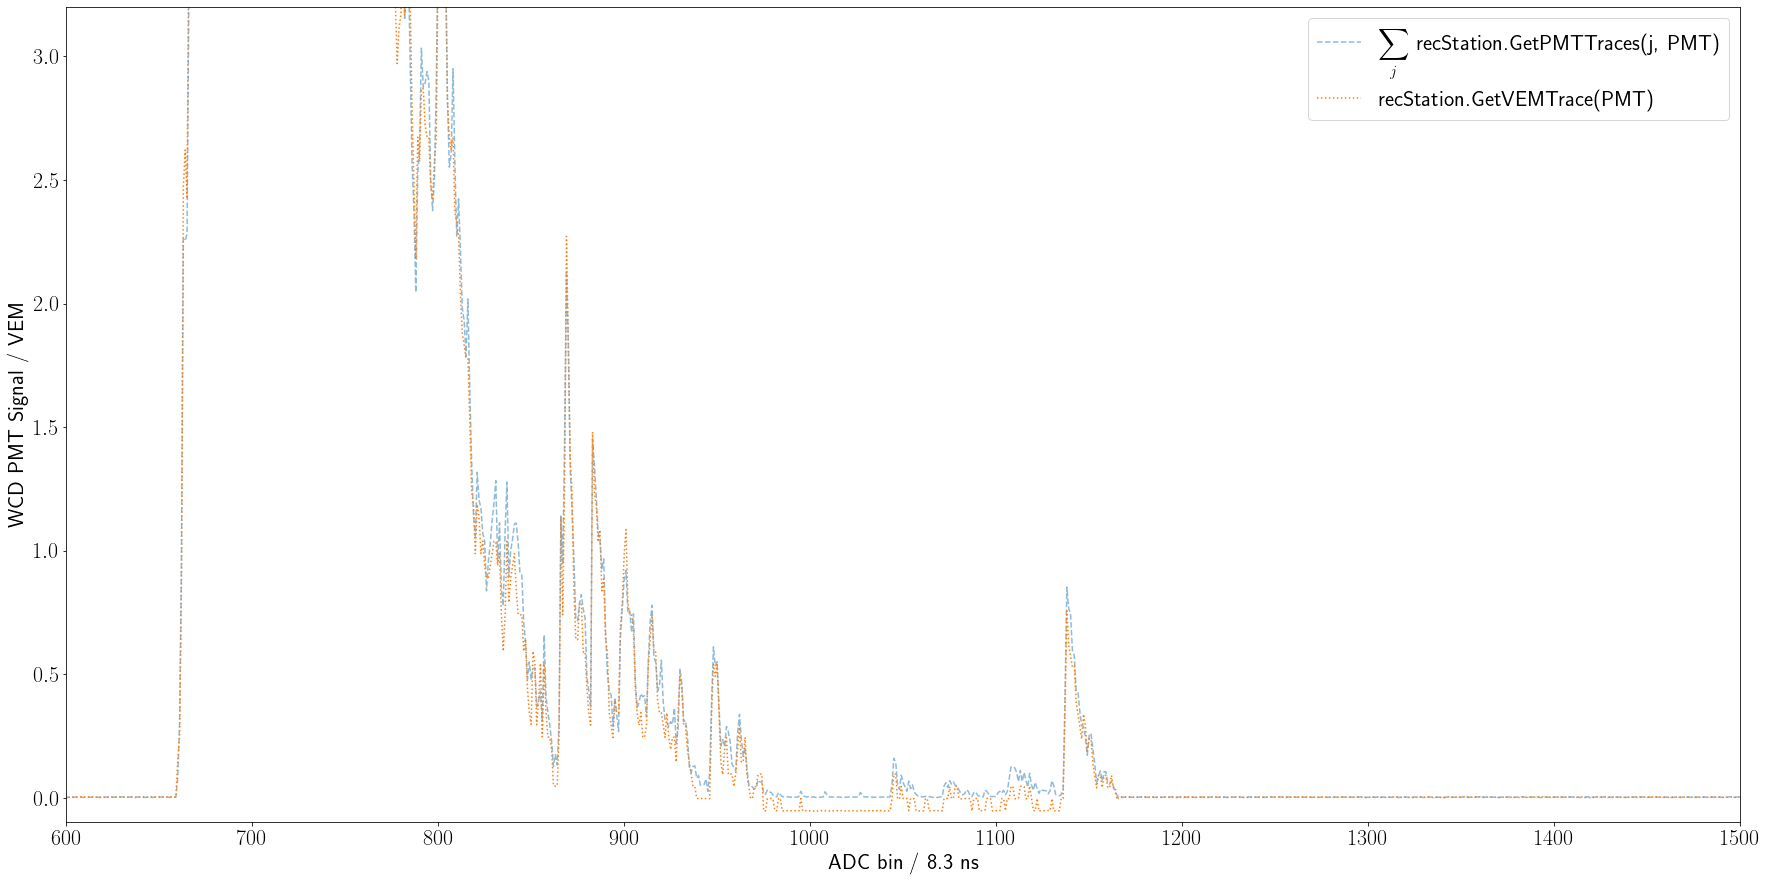

In [4]:
start_time = perf_counter_ns()
image = np.zeros((1001, 2048))

plt.rcParams['text.usetex'] = True

i = 0
j = EventsADC.files.index("/cr/tempdata01/filip/QGSJET-II/COMPARE/ADC/" + EventsVEM.files[i].split('/')[-1])

tracesVEM = EventsVEM.__getitem__(i)
tracesADC = EventsADC.__getitem__(j)

ax= plt.subplot(1,1,1)

idx = 1
VEM, ADC = tracesVEM[idx], tracesADC[idx]

# for VEM, ADC in zip(tracesVEM, tracesADC):
while True:
    # color = next(ax._get_lines.prop_cycler)['color']

    vem_trace = 1/3 * (VEM.pmt_1 + VEM.pmt_2 + VEM.pmt_3)
    adc_trace = 1/3 * (ADC.pmt_1 + ADC.pmt_2 + ADC.pmt_3)

    plt.xlim(600, 1500)
    plt.ylim(-0.1, 3.2)
    plt.plot(range(2048), adc_trace, label = r"$\displaystyle\sum_{j}$ recStation.GetPMTTraces(j, PMT)", ls = "--", alpha = 0.5)
    plt.plot(range(2048), vem_trace, label = "recStation.GetVEMTrace(PMT)", ls = ":")

    plt.ylabel(r"WCD PMT Signal / VEM")
    plt.xlabel("ADC bin / 8.3 ns")

    plt.legend()
    break

In [ ]:
plt.imshow(image, origin = "lower")
_, _ = plt.yticks(np.arange(0, 1001, 100), [f"{b:.1f}" for b in np.arange(0, 1001, 100)/500 - 1])
plt.ylabel(r"PMT$_\mathrm{VEM}$ - $\frac{\mathrm{PMT}_\mathrm{ADC}}{q_\mathrm{Peak}}$ / VEM")

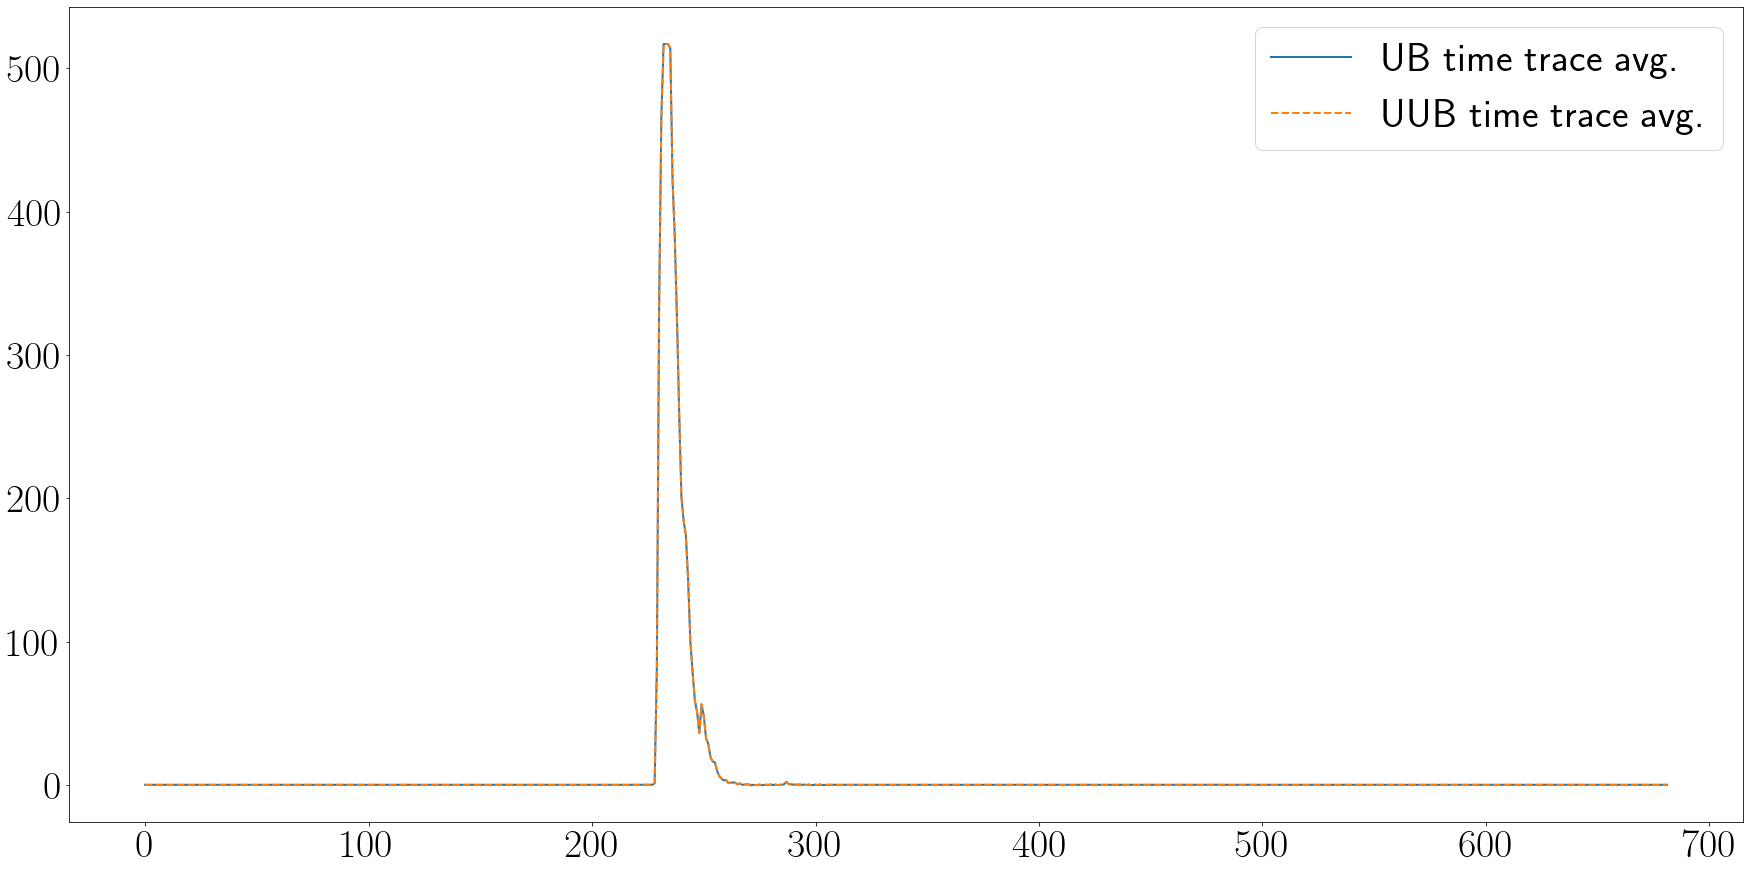

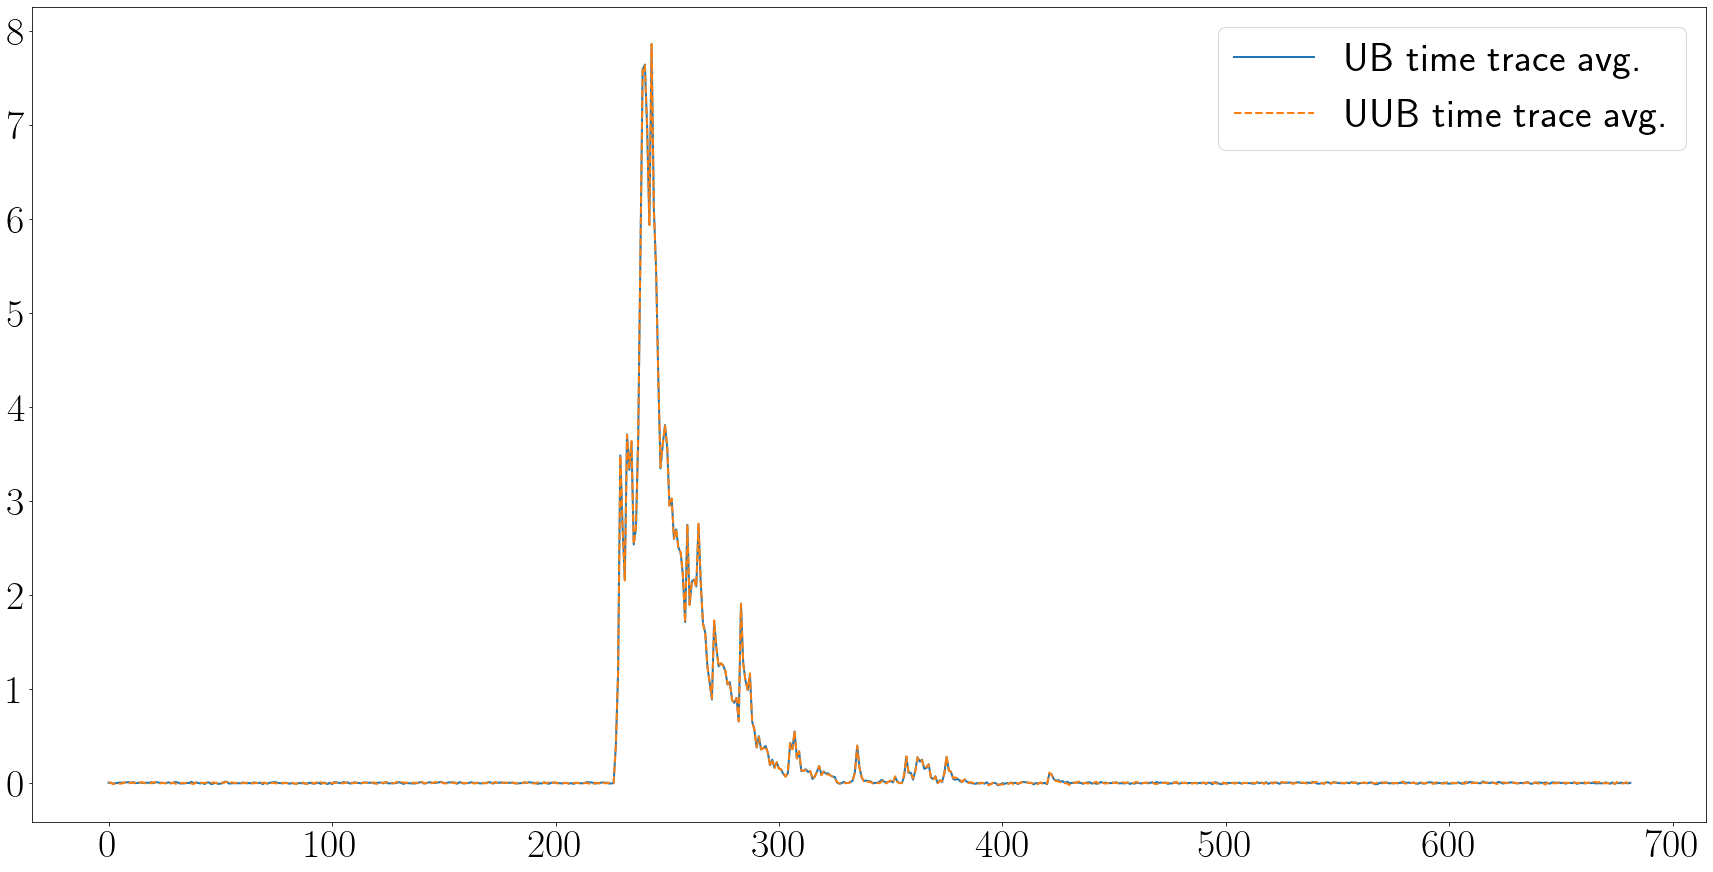

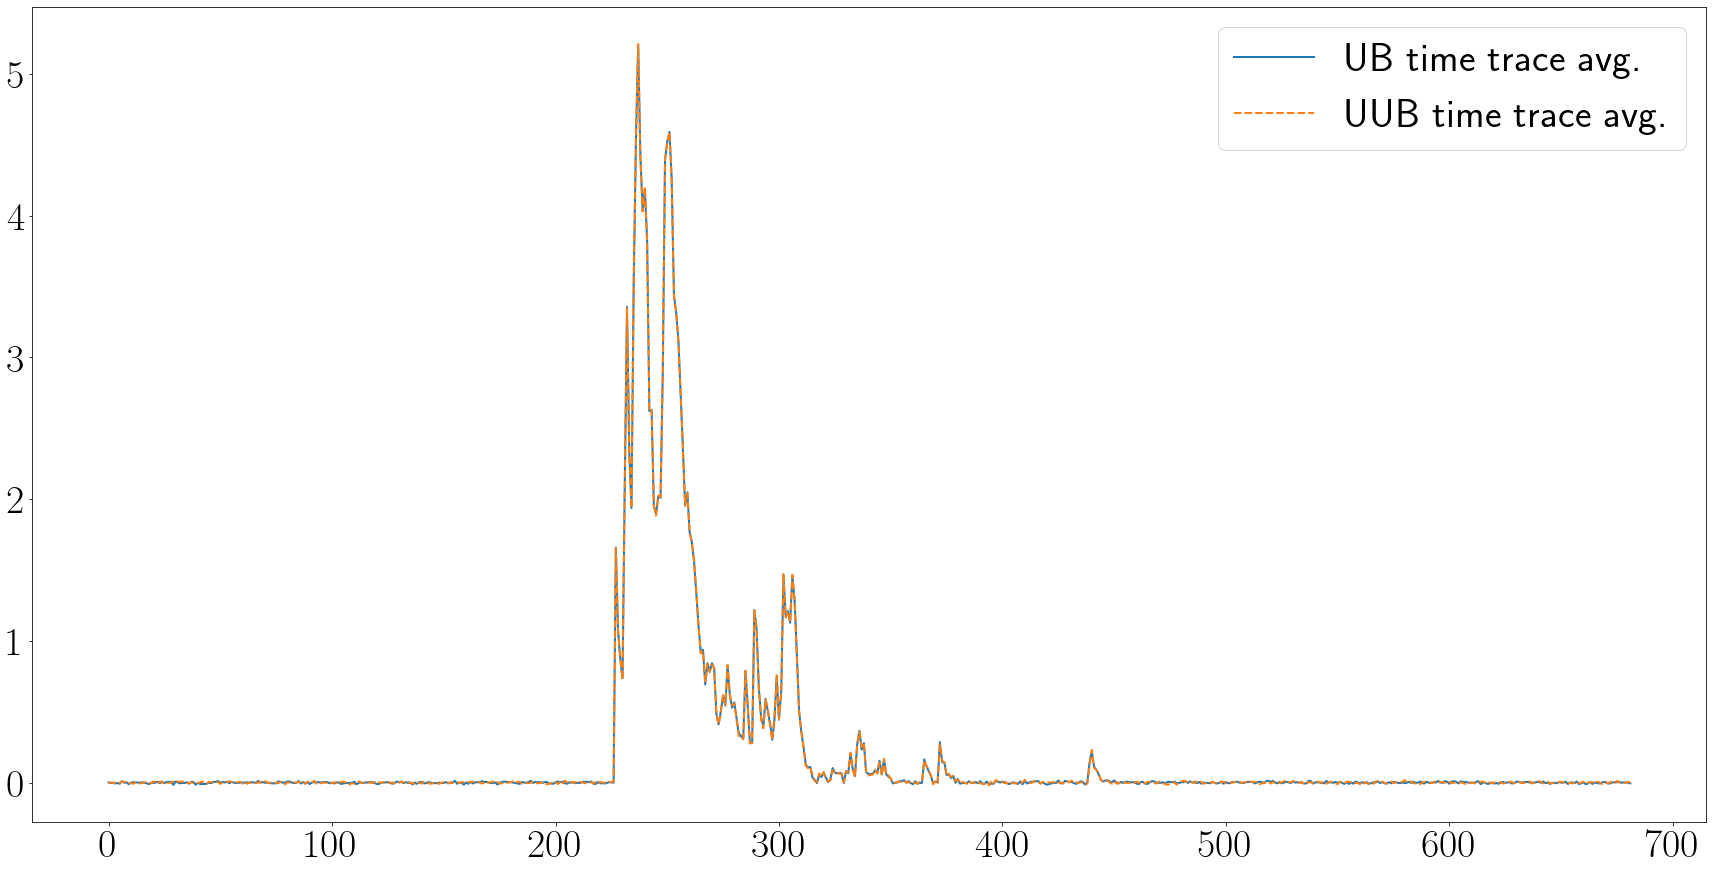

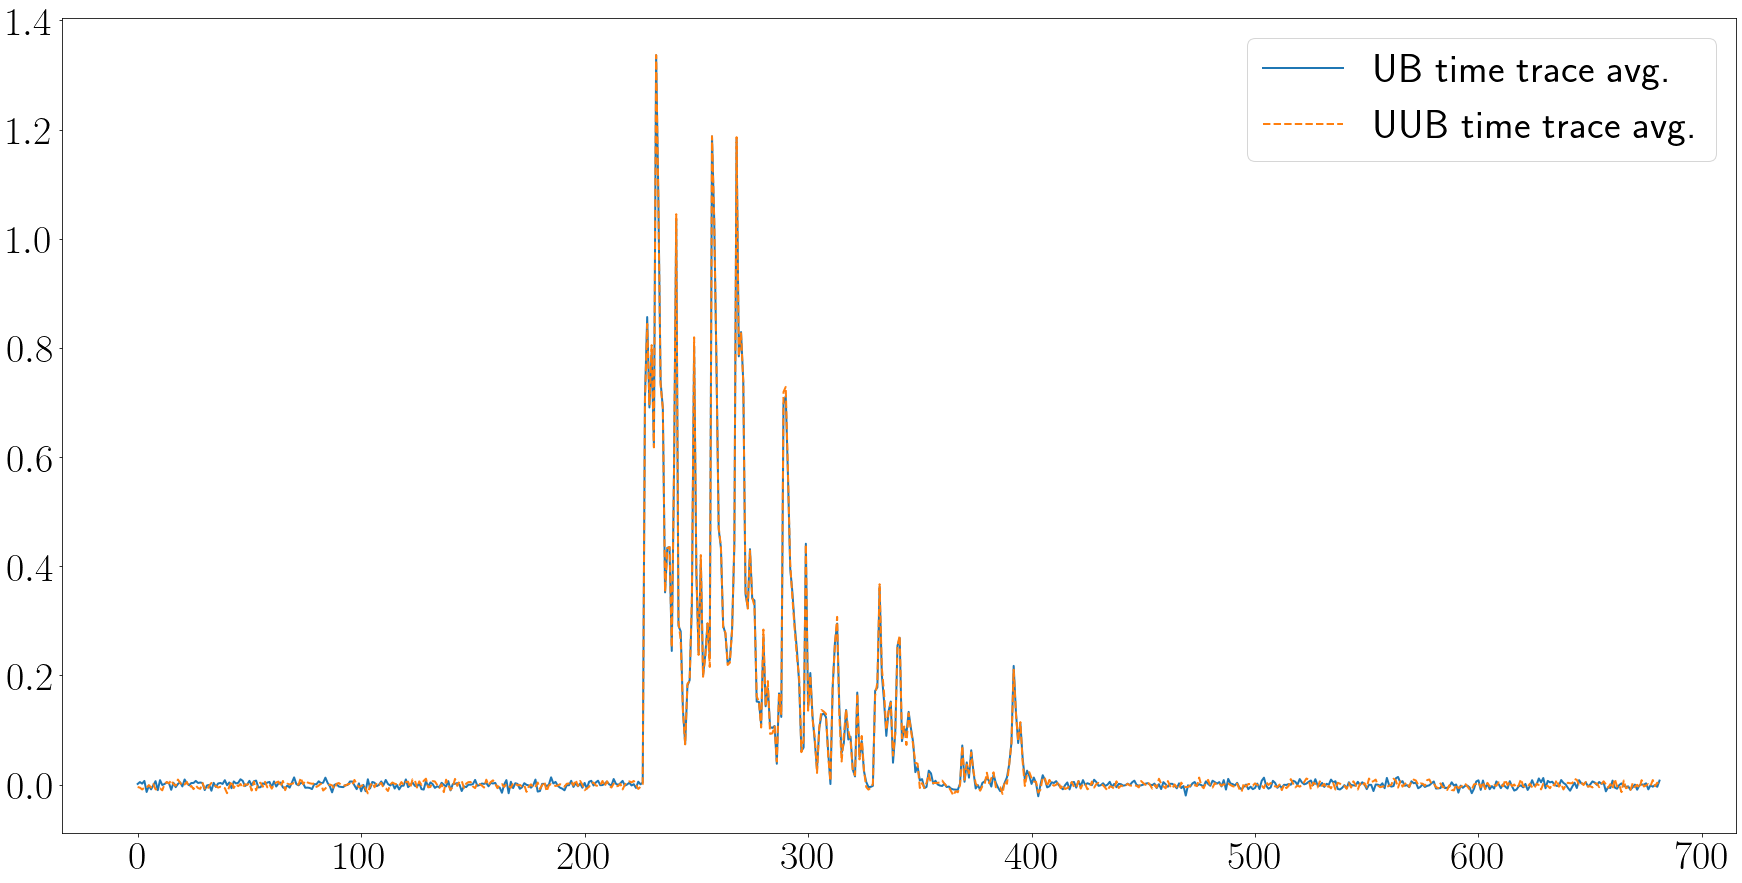

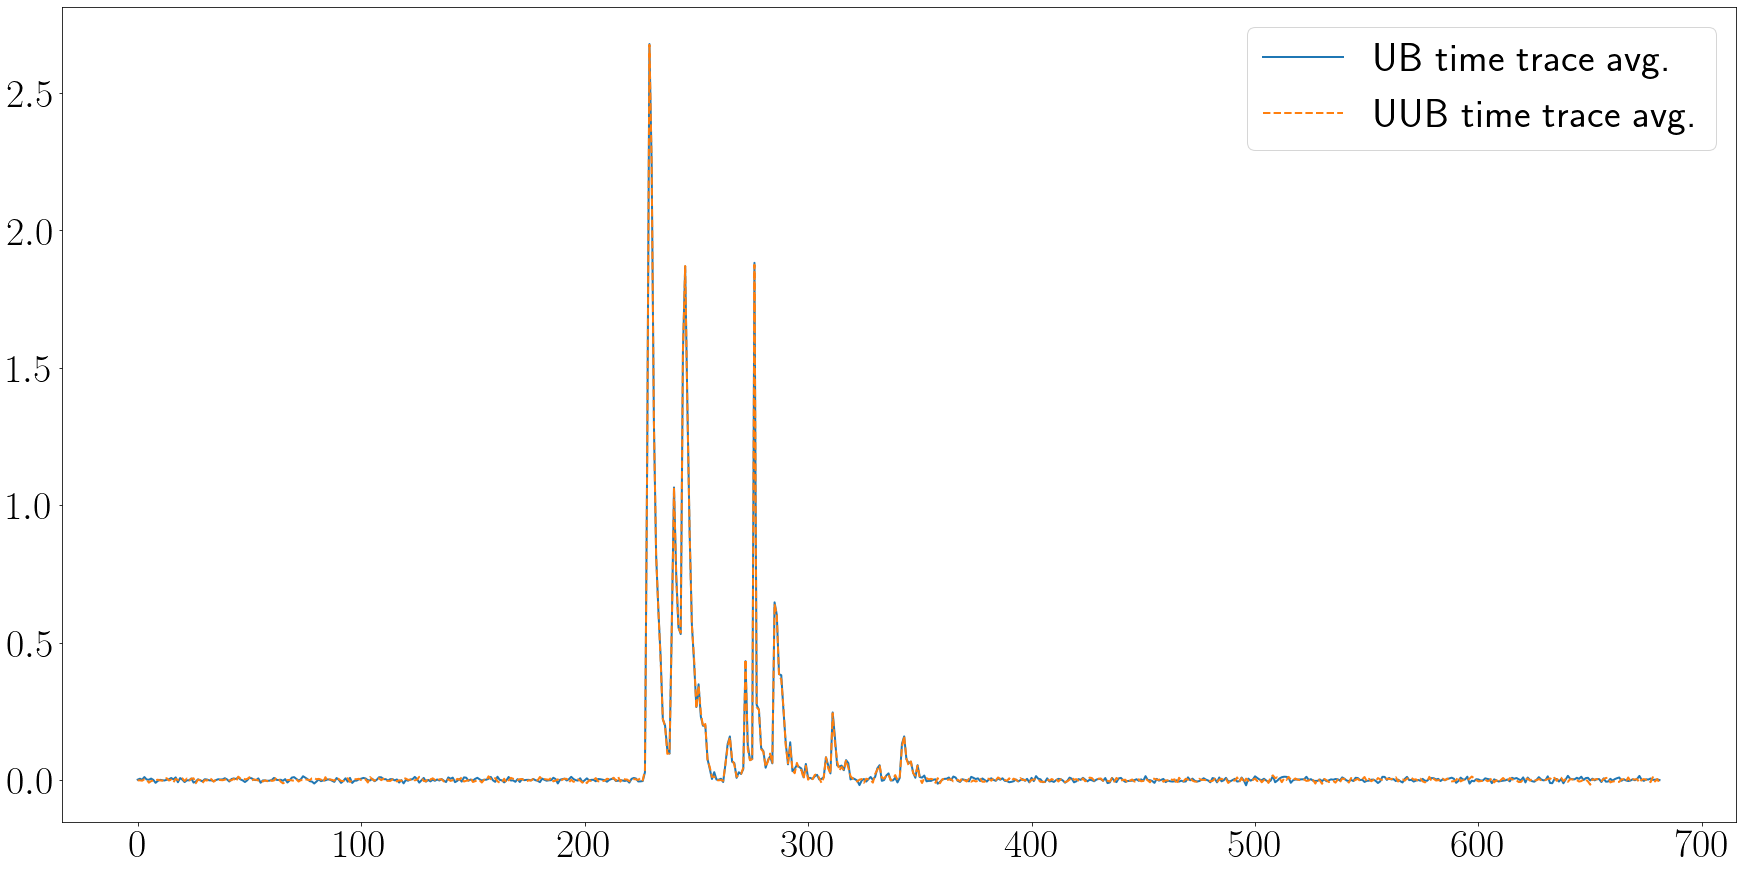

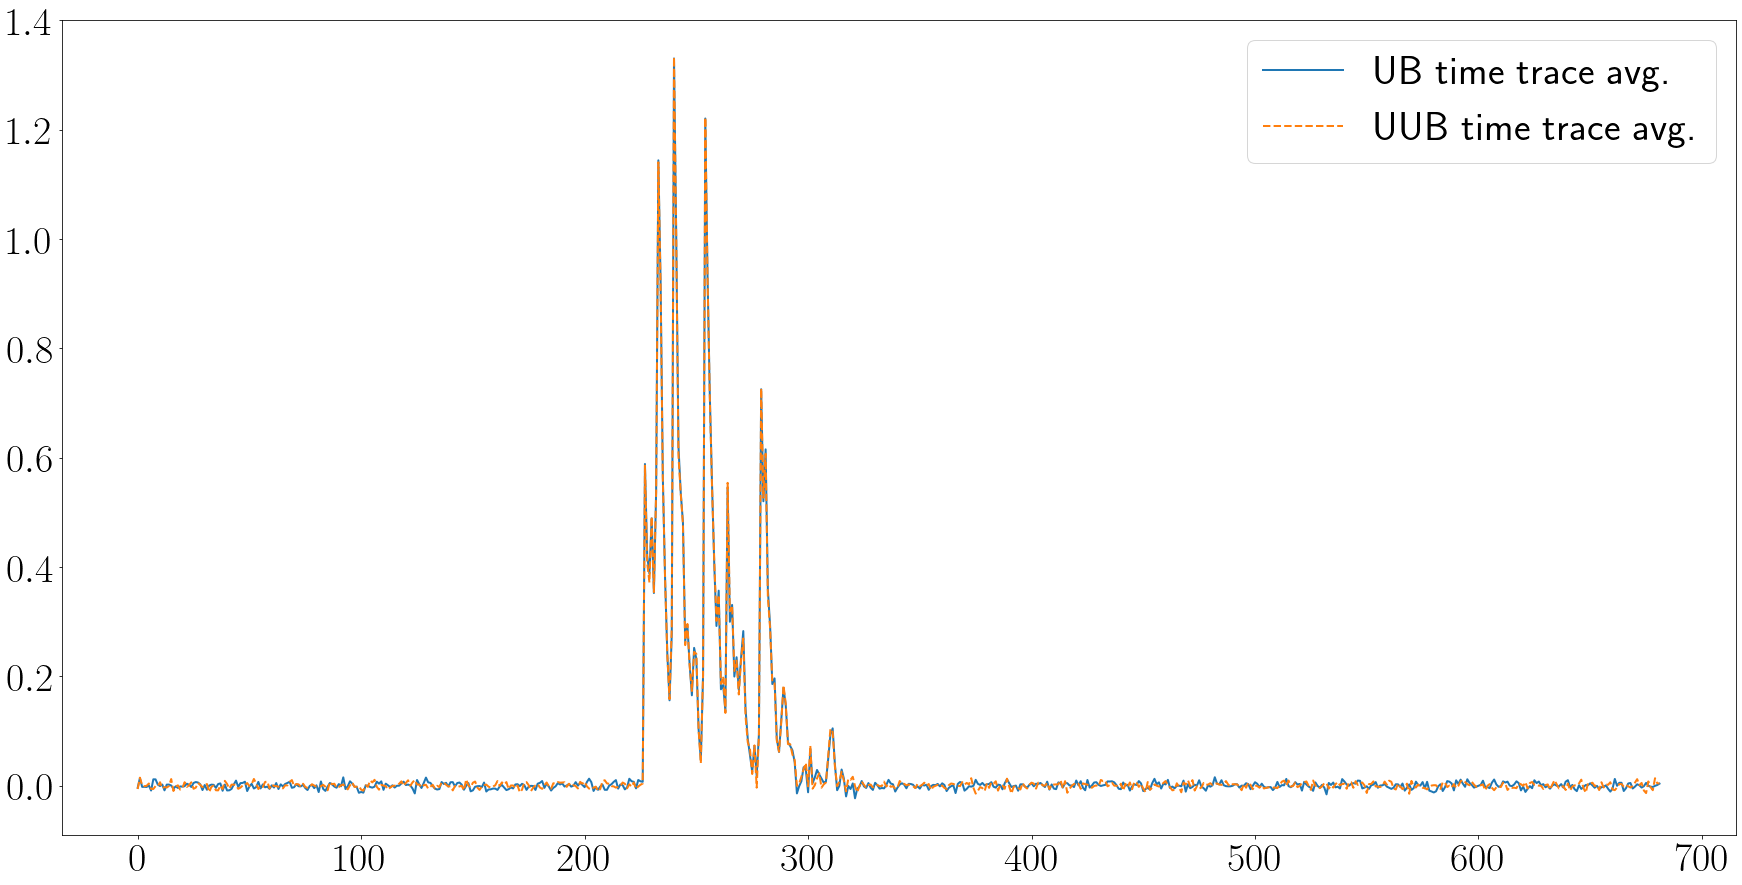

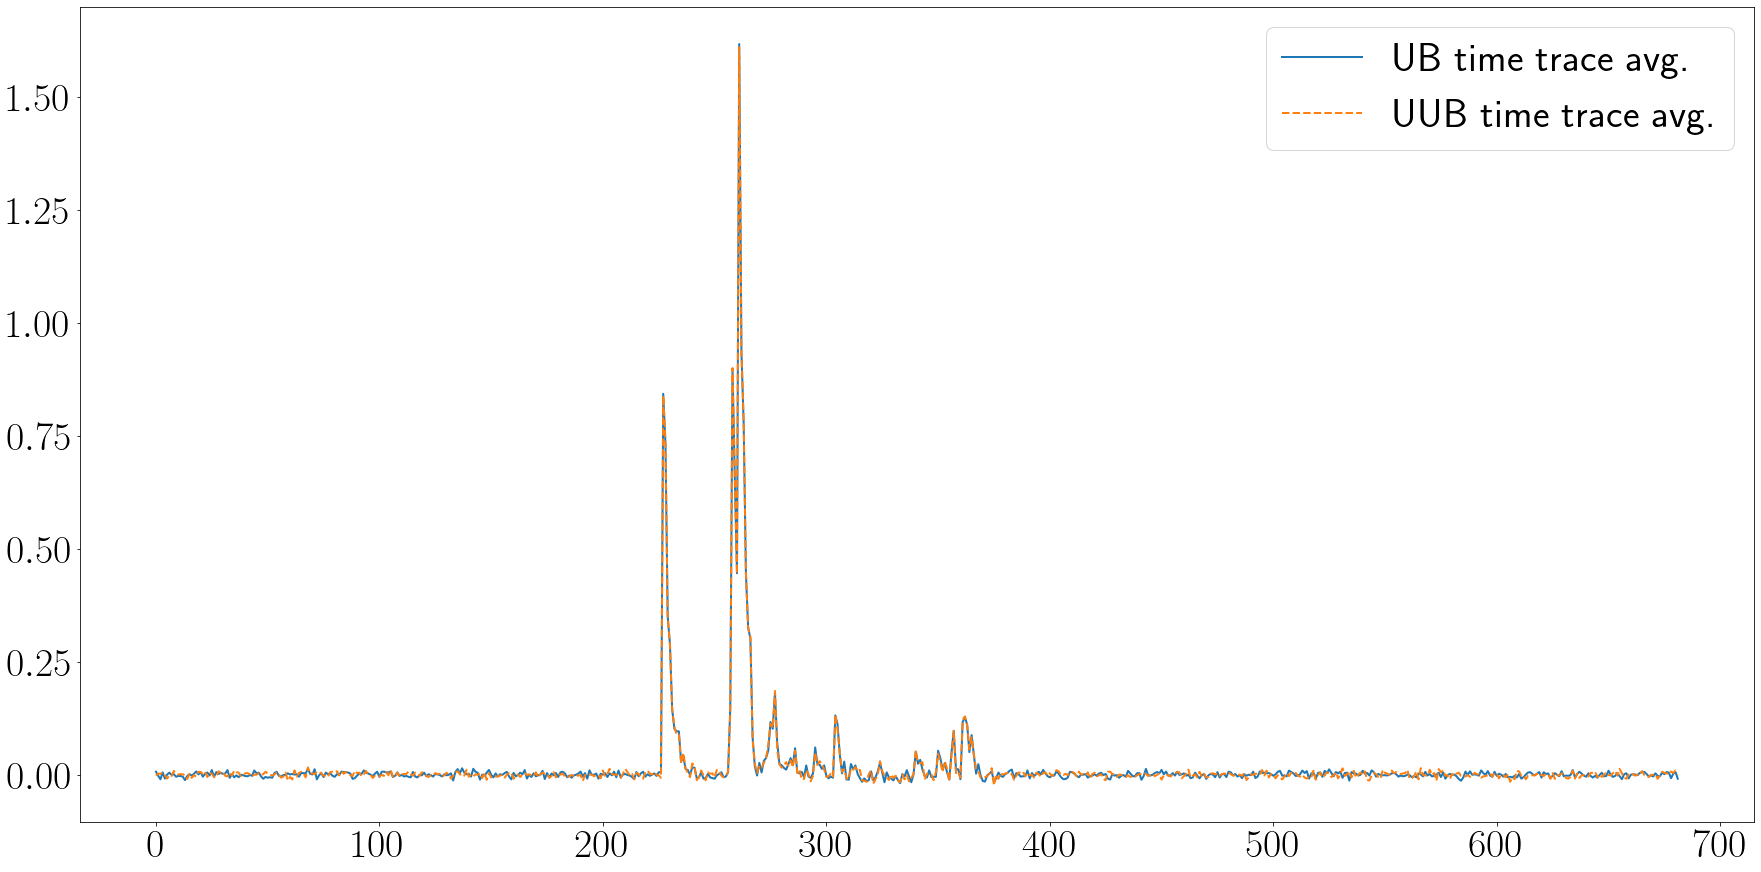

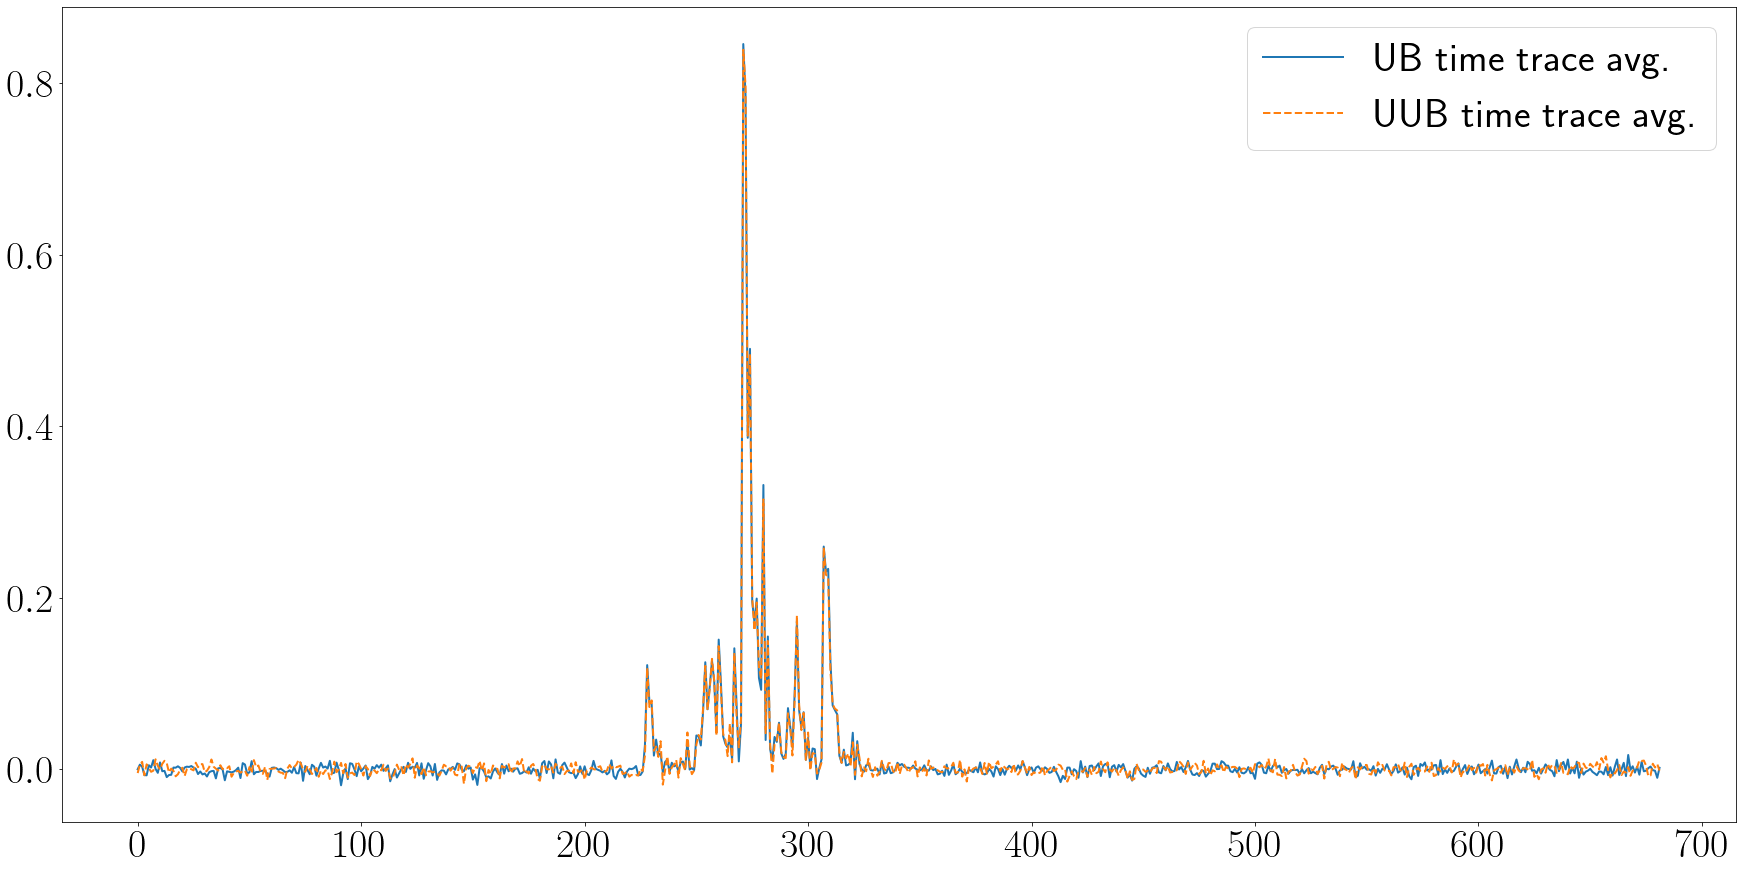

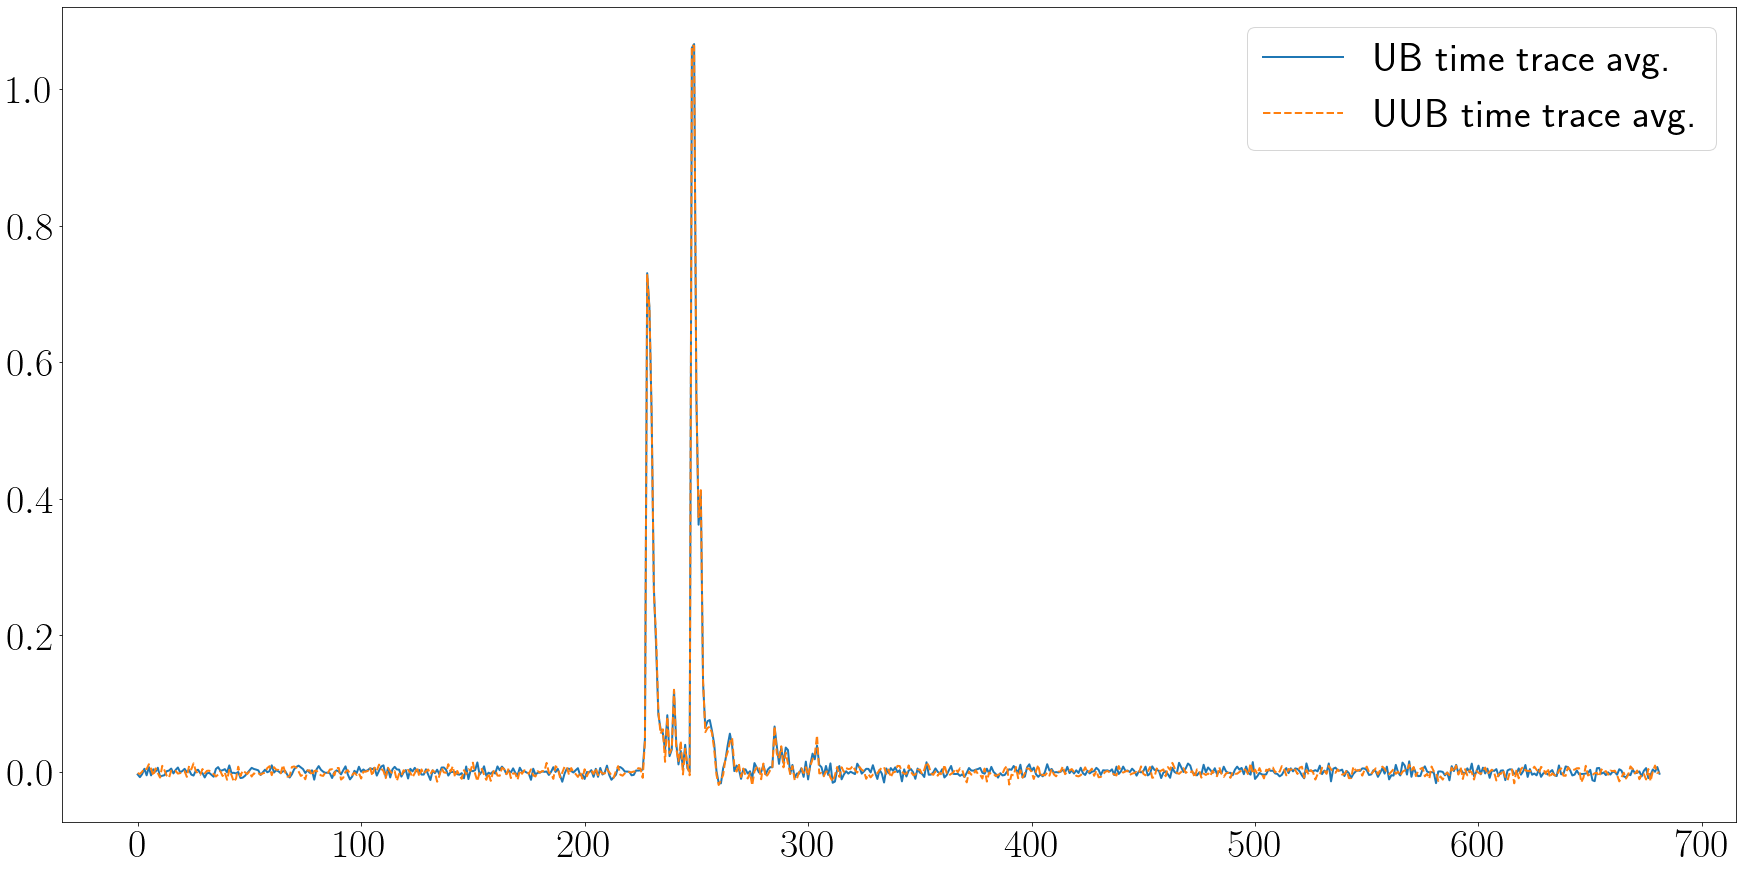

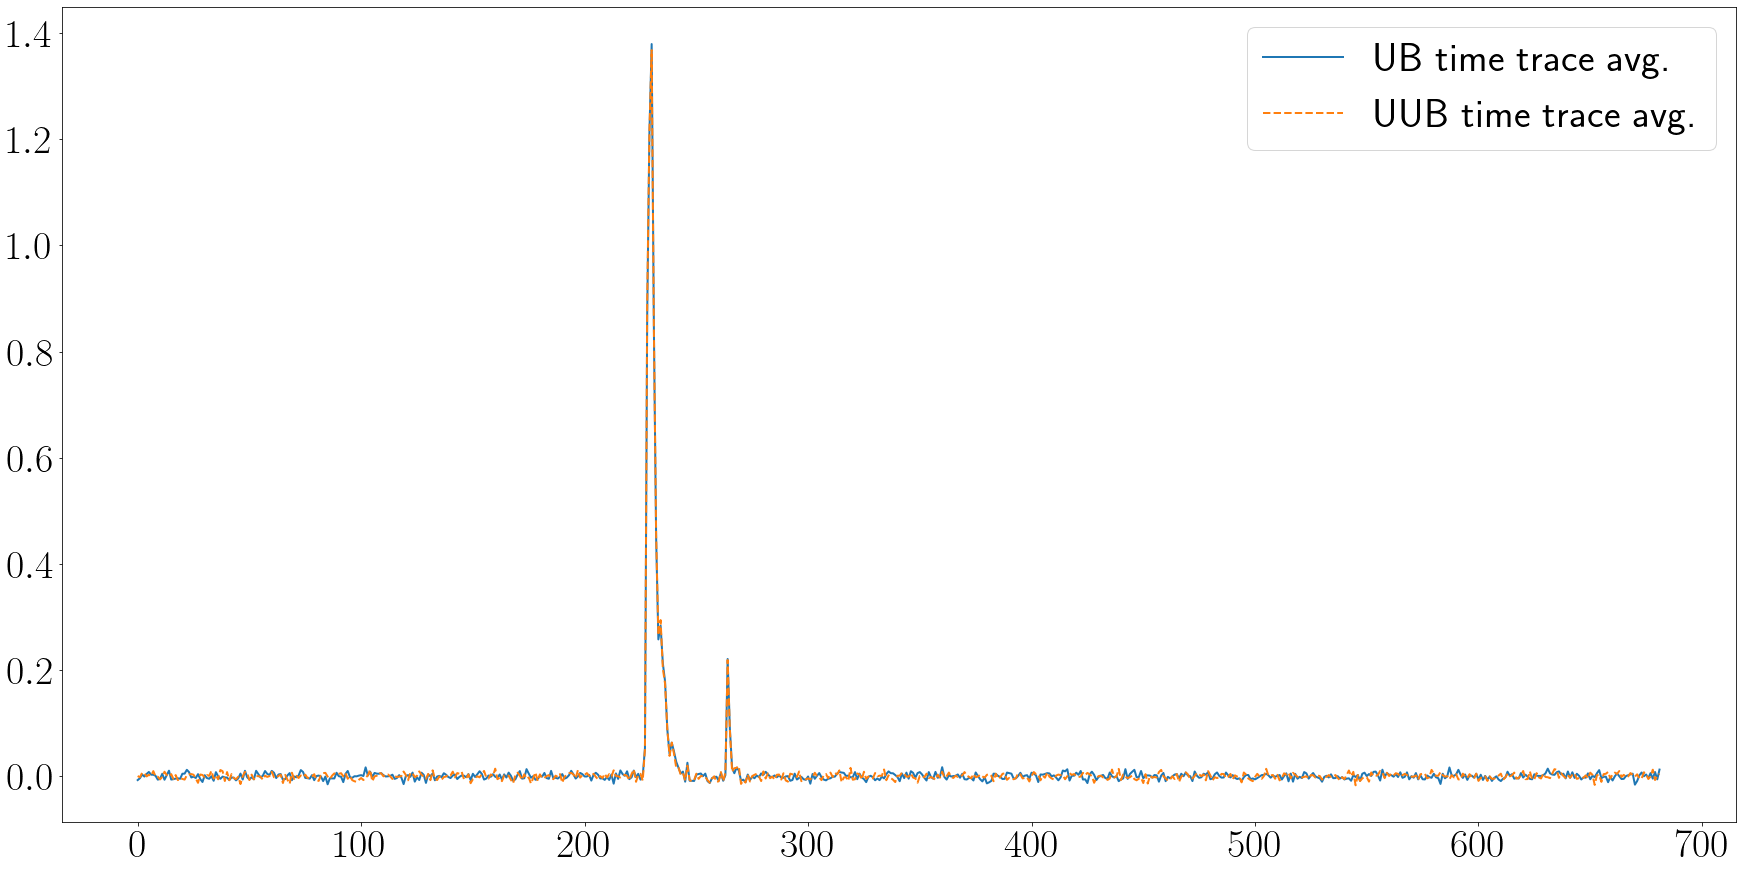

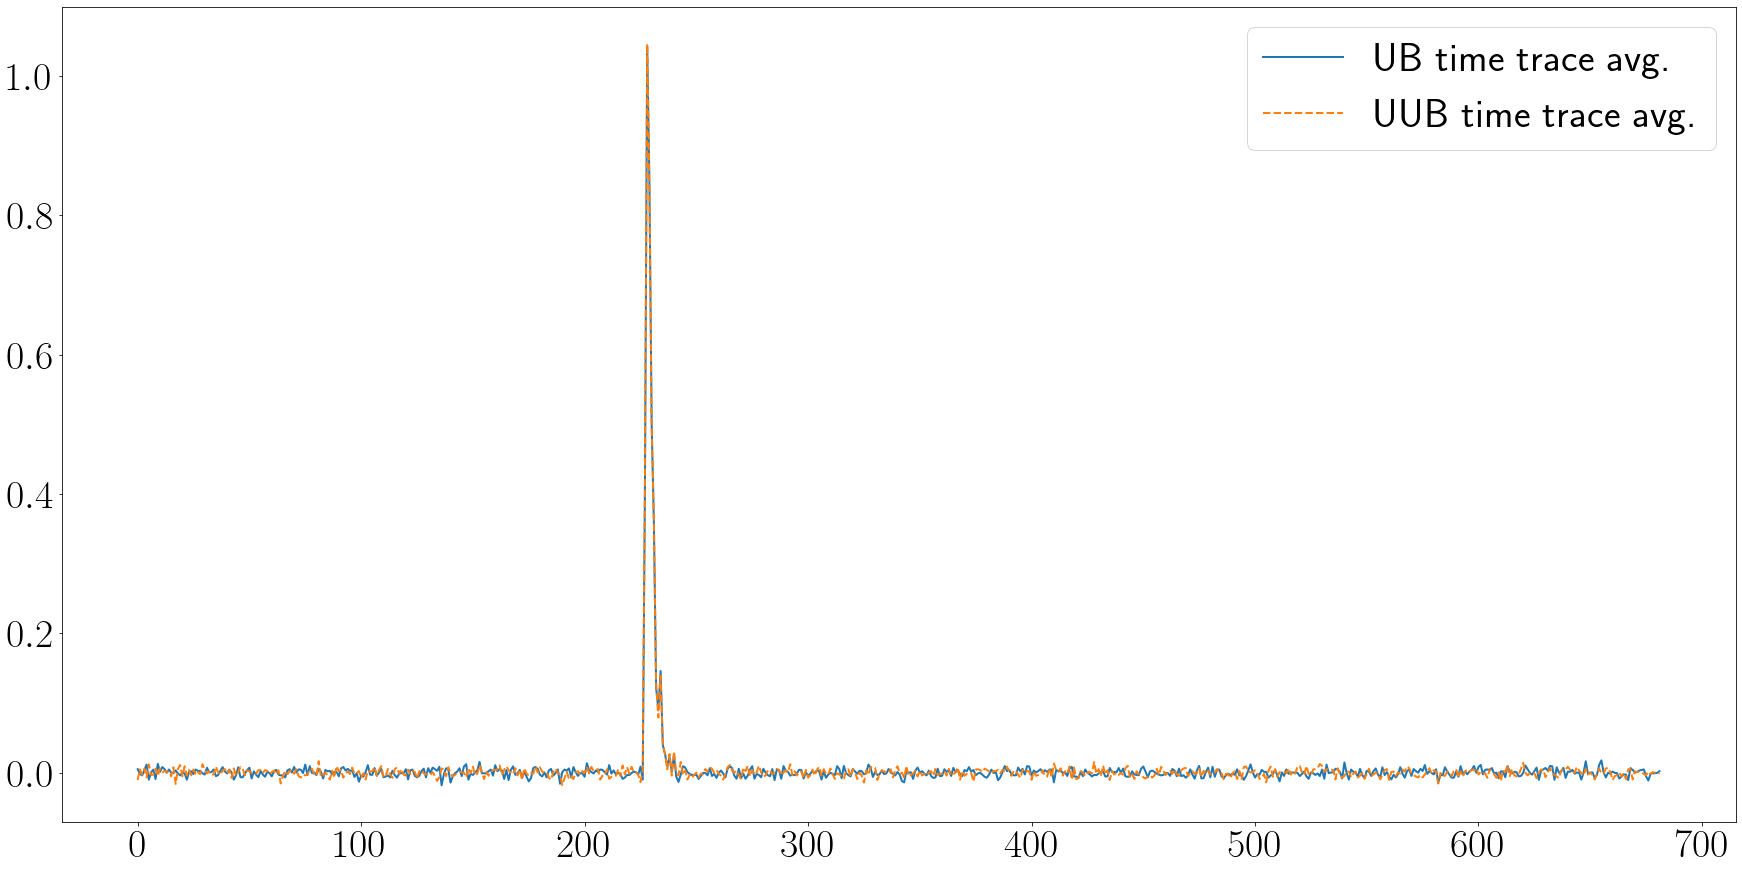

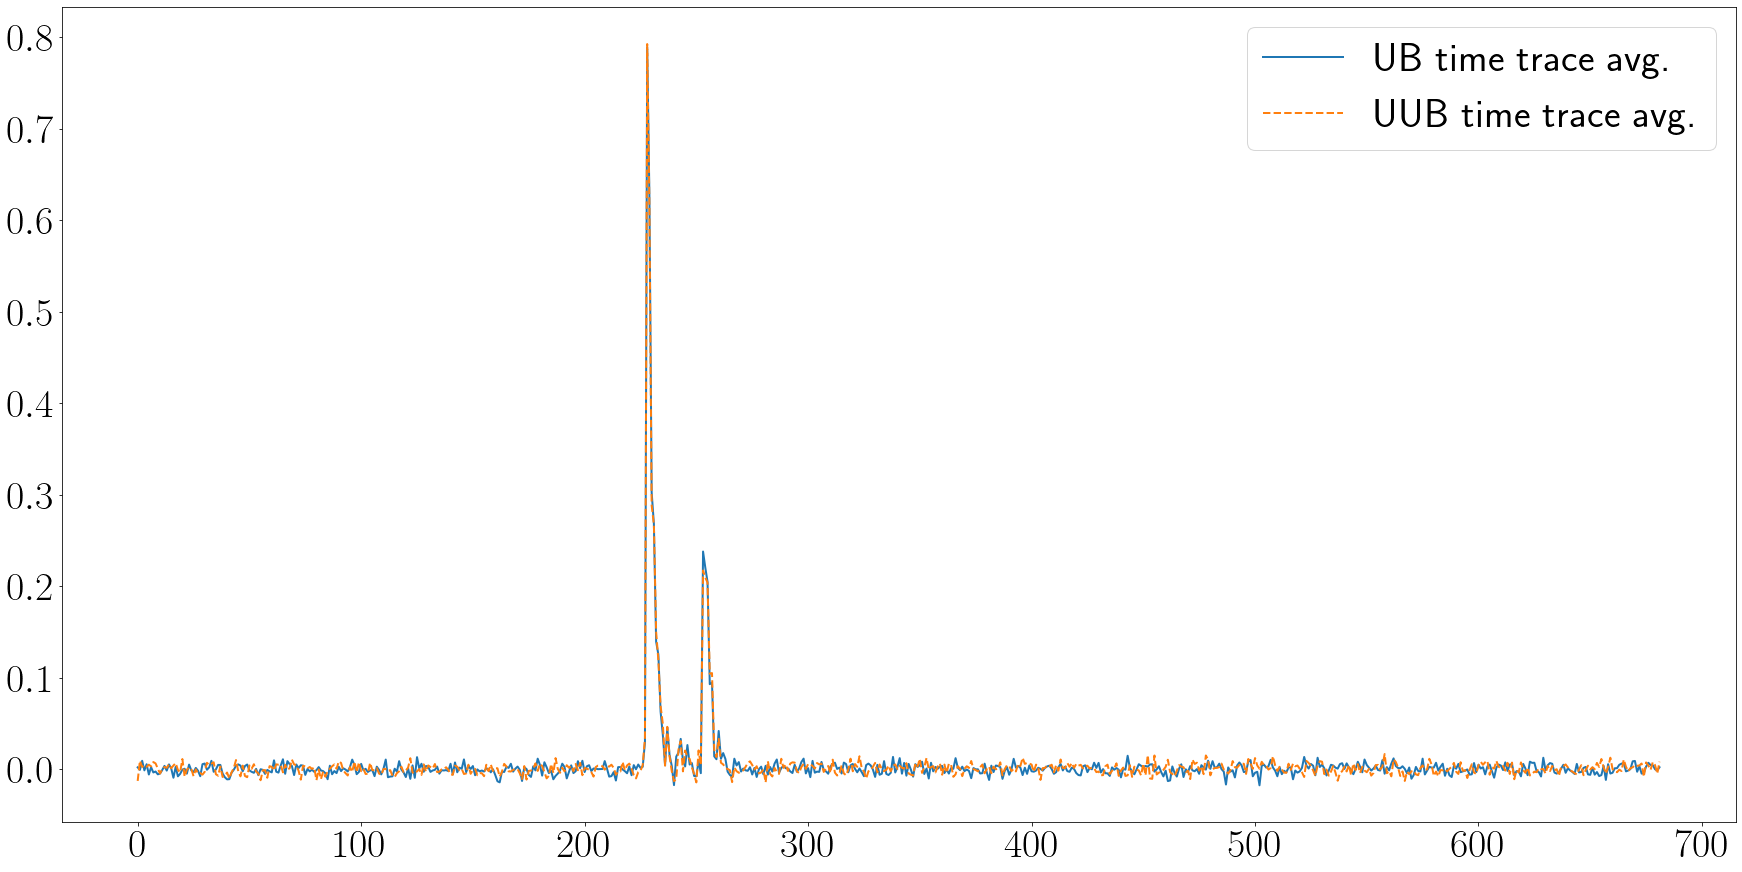

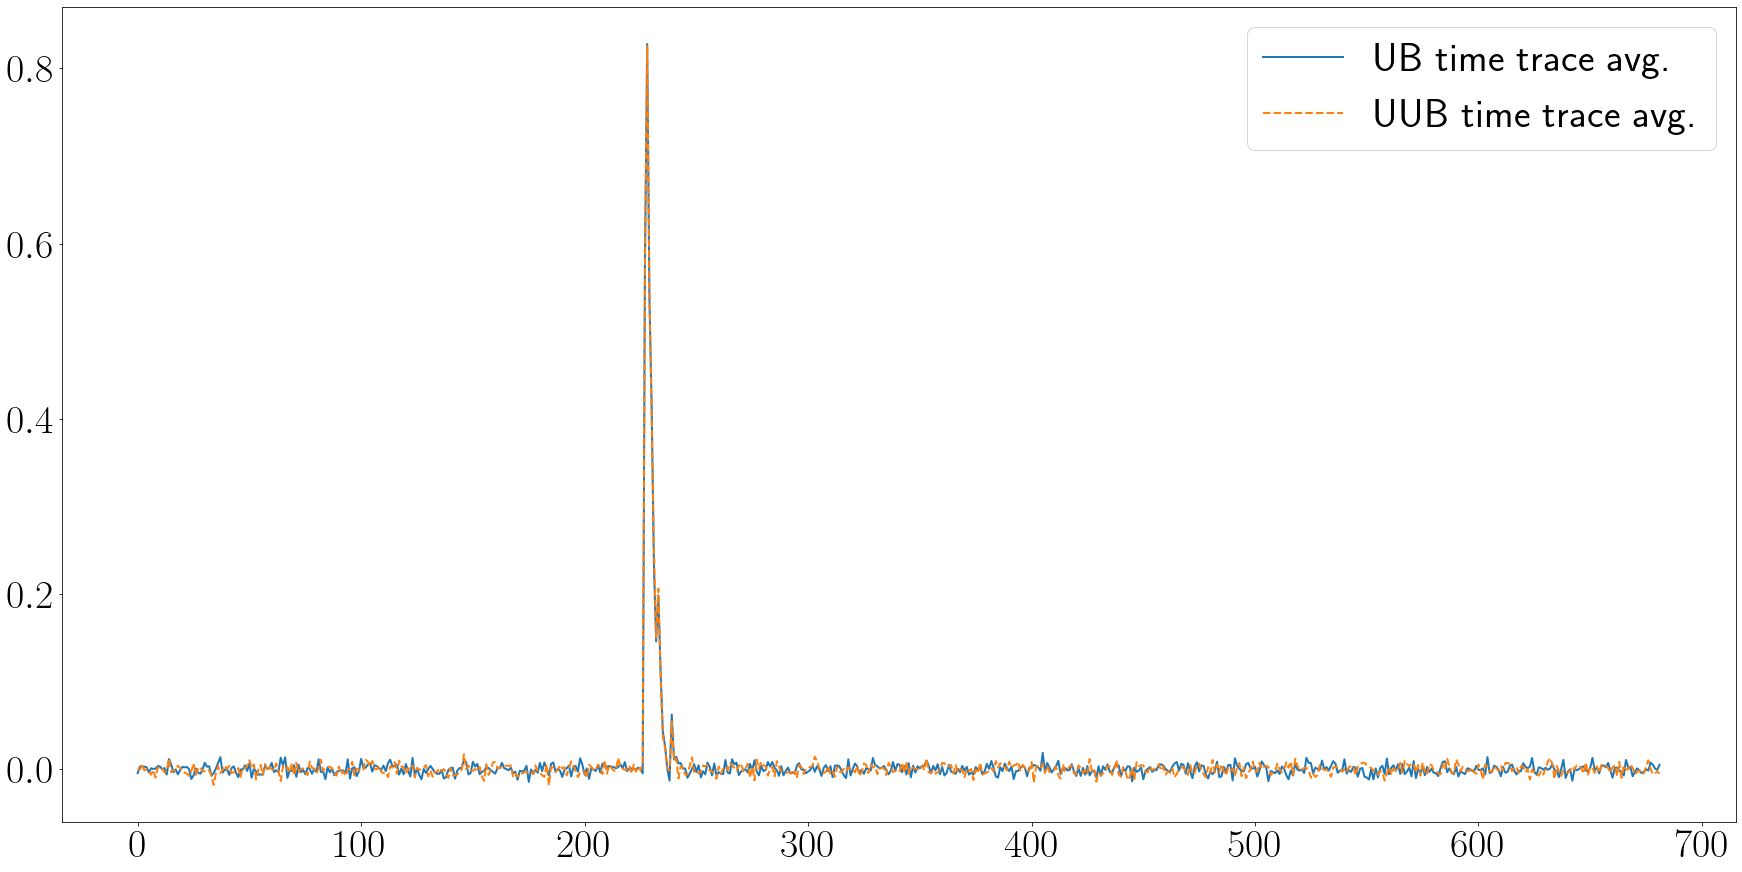

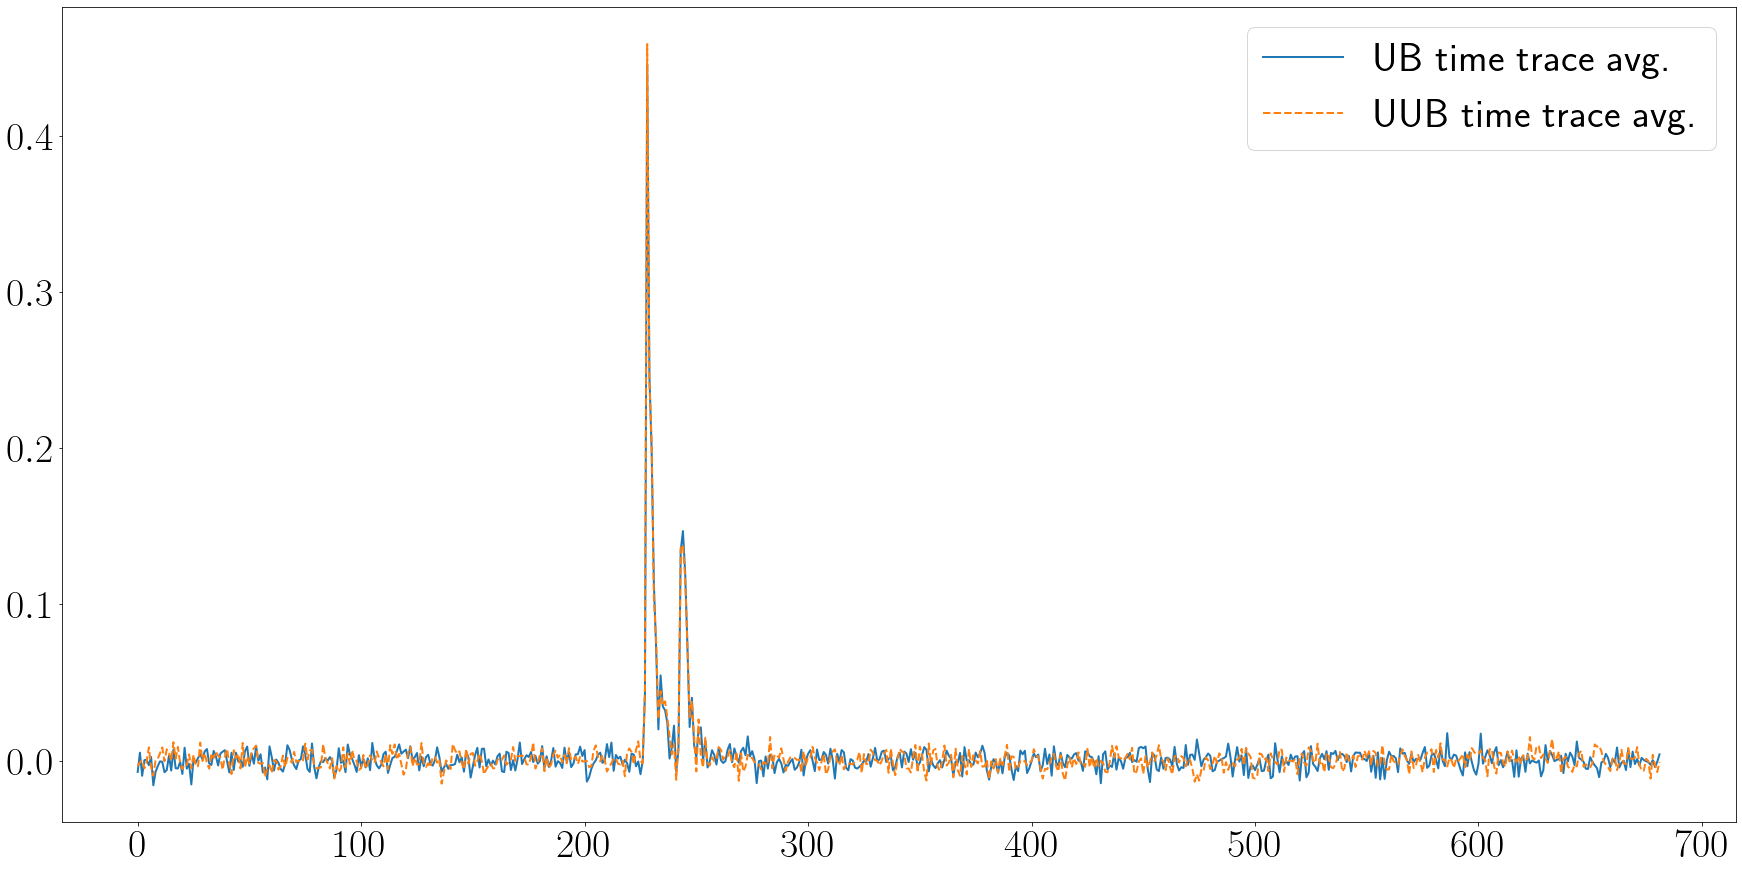

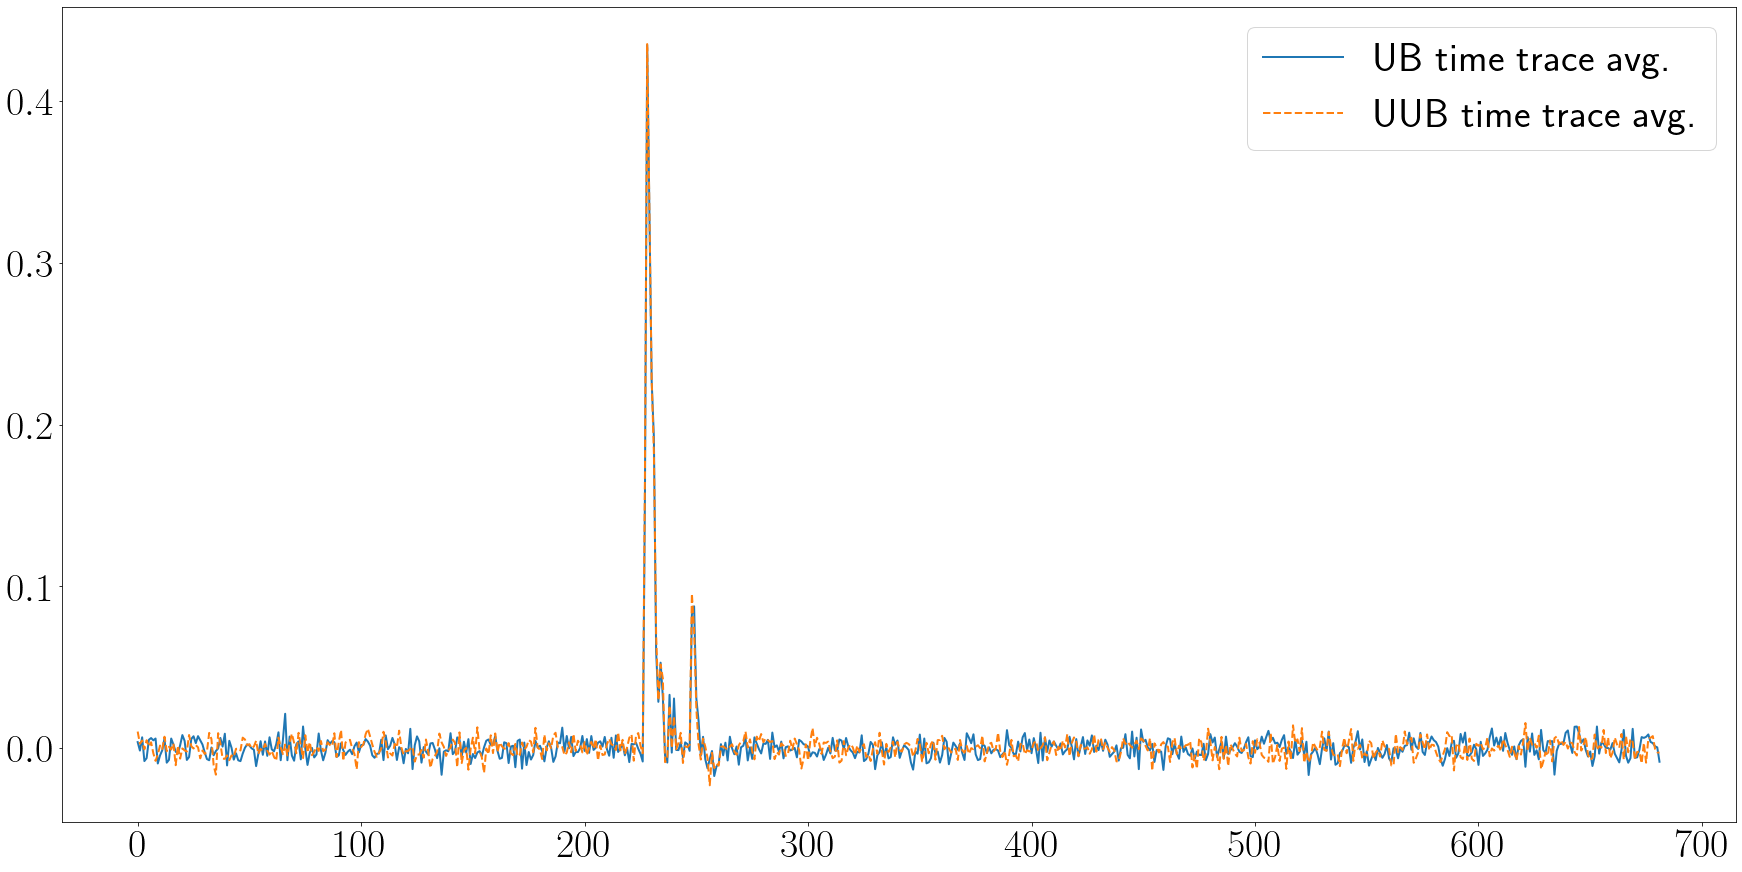

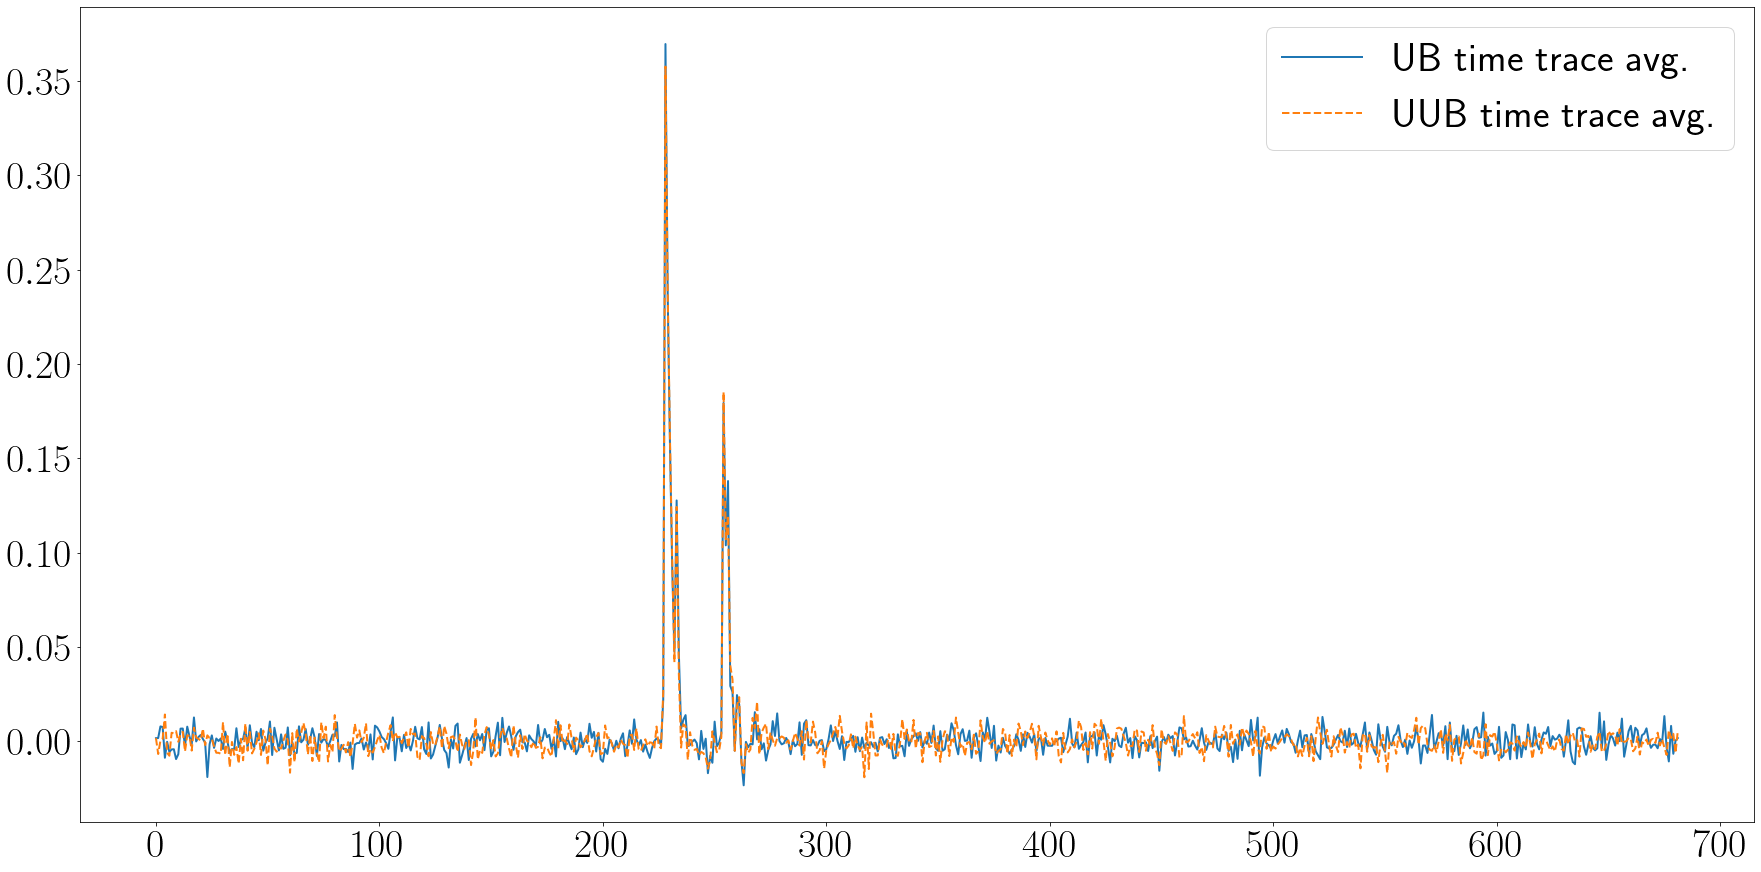

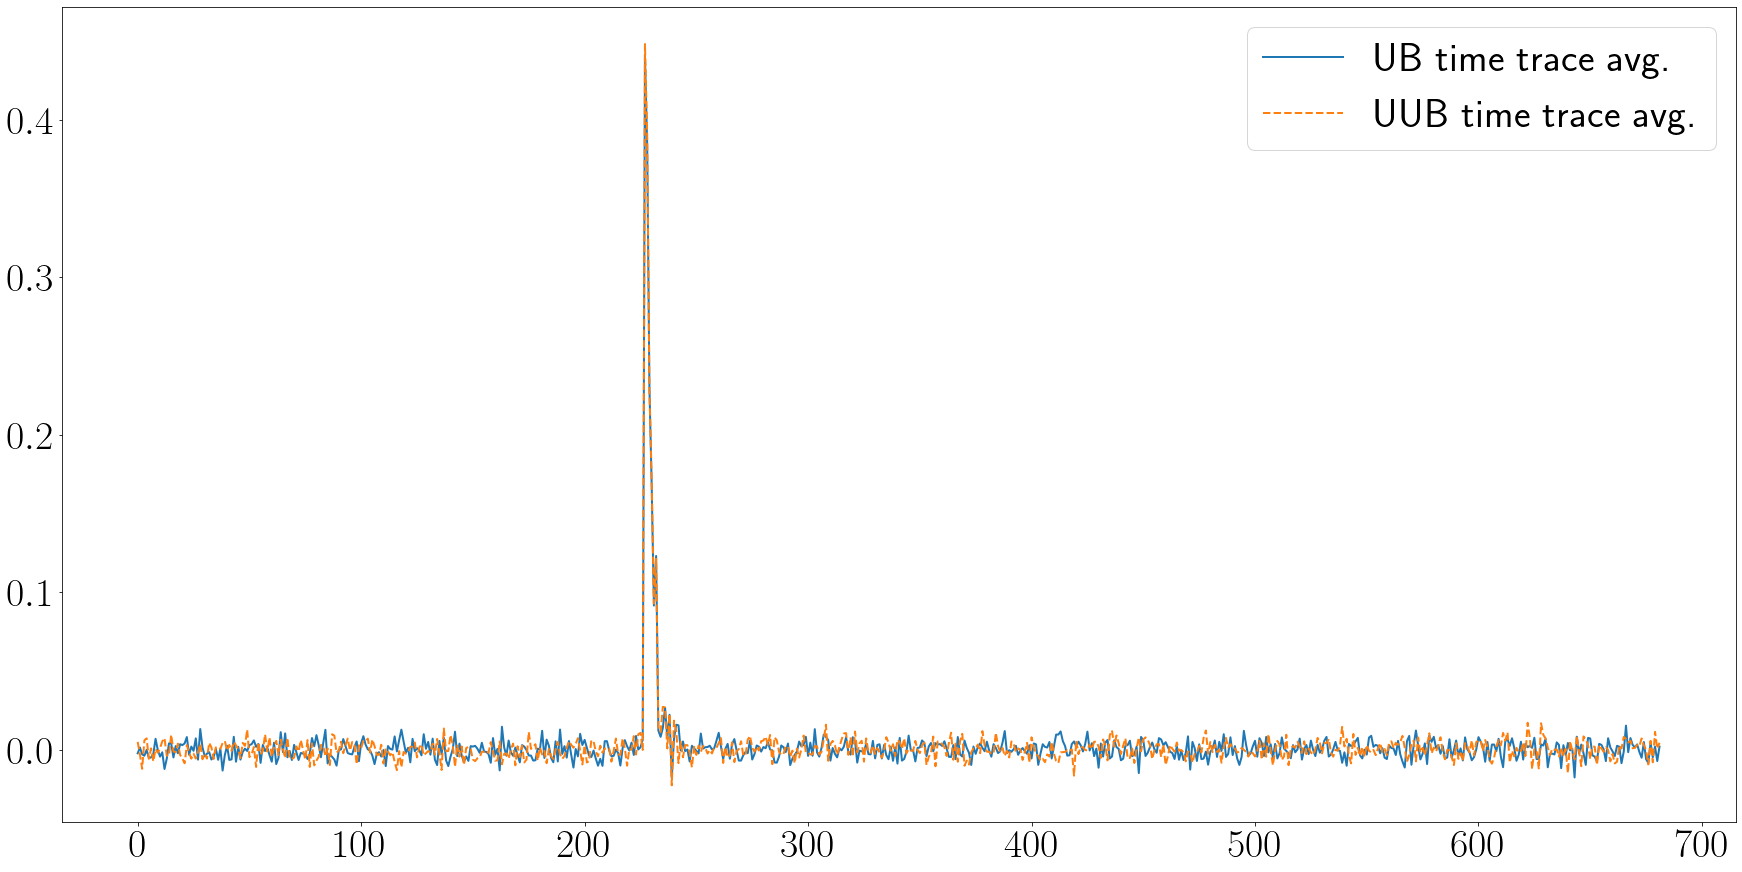

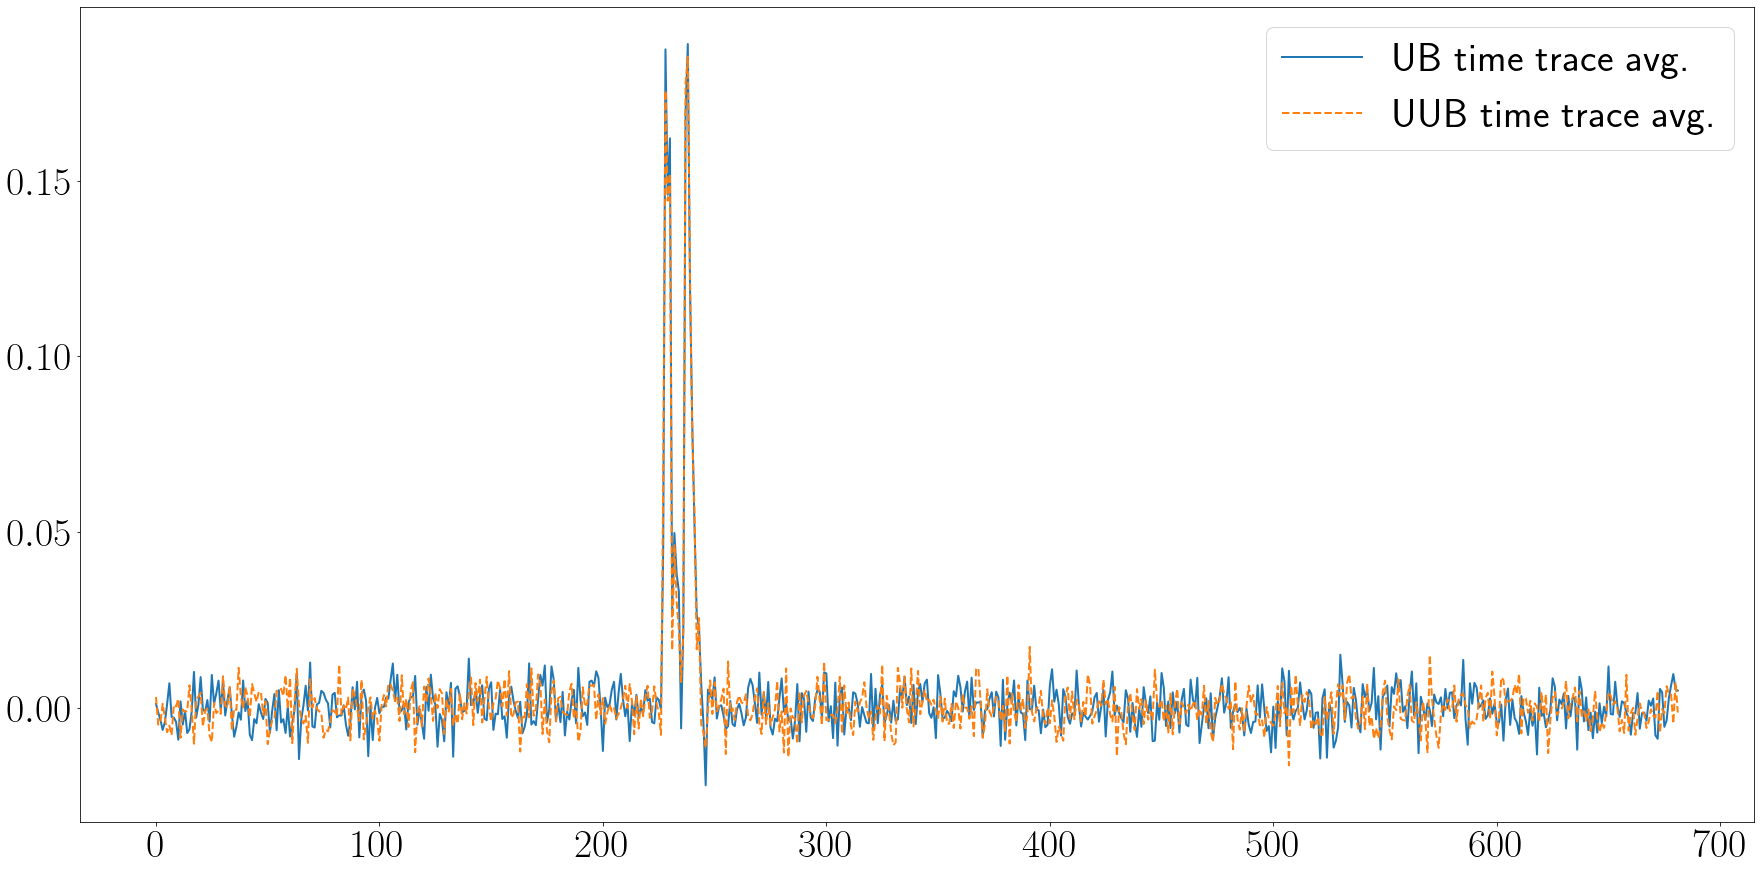

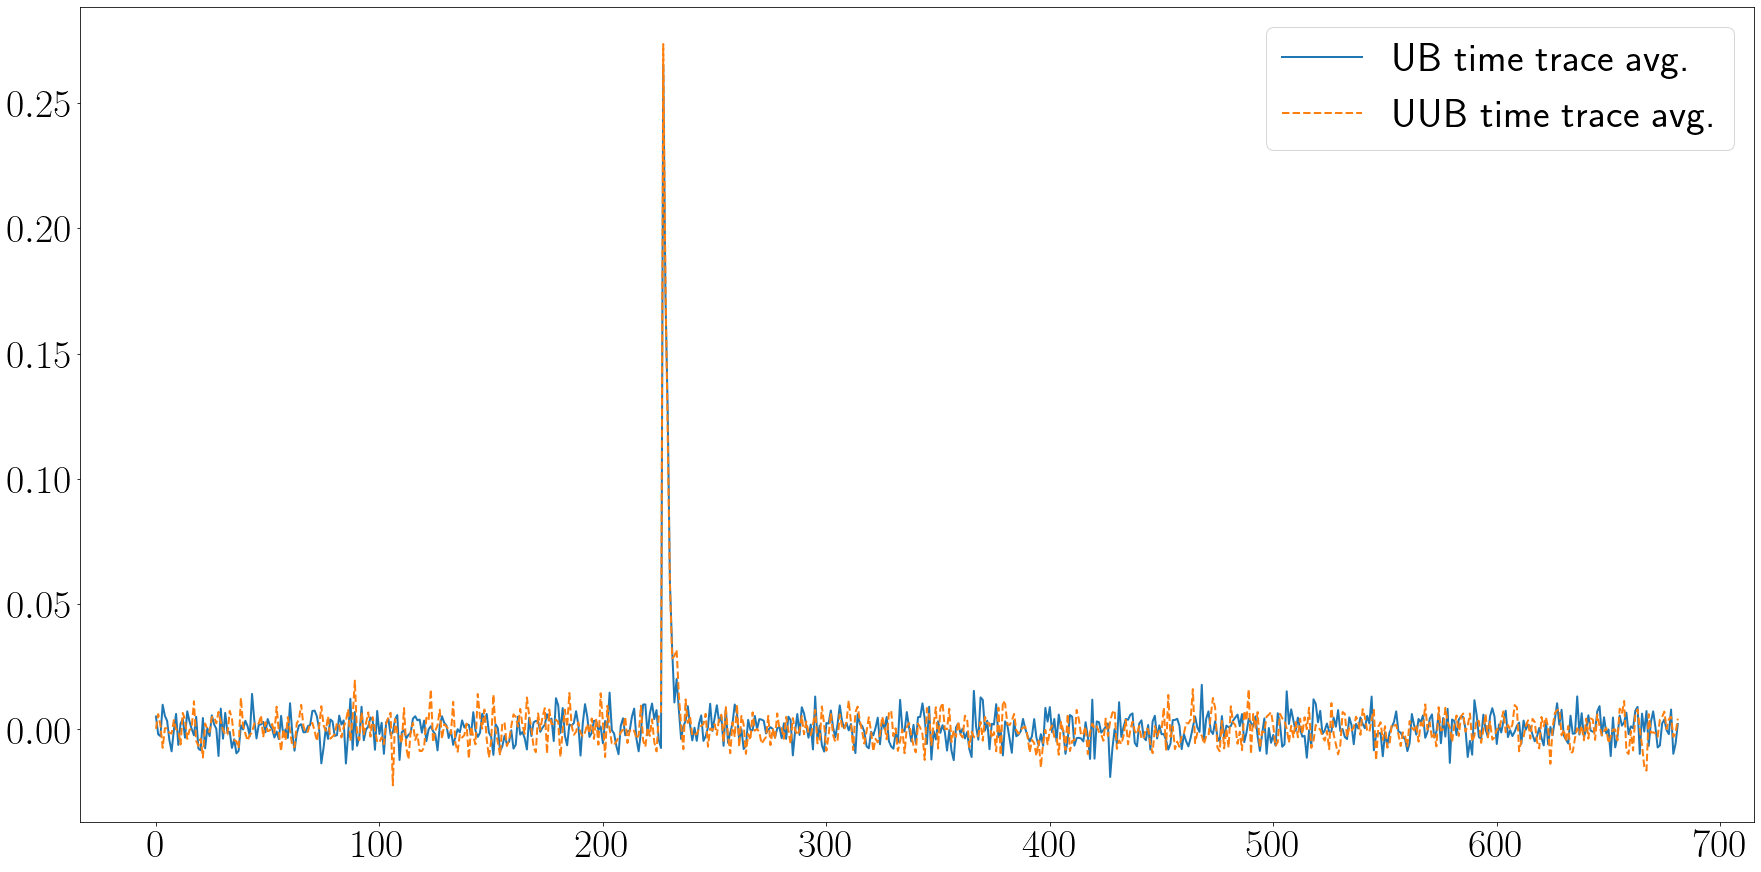

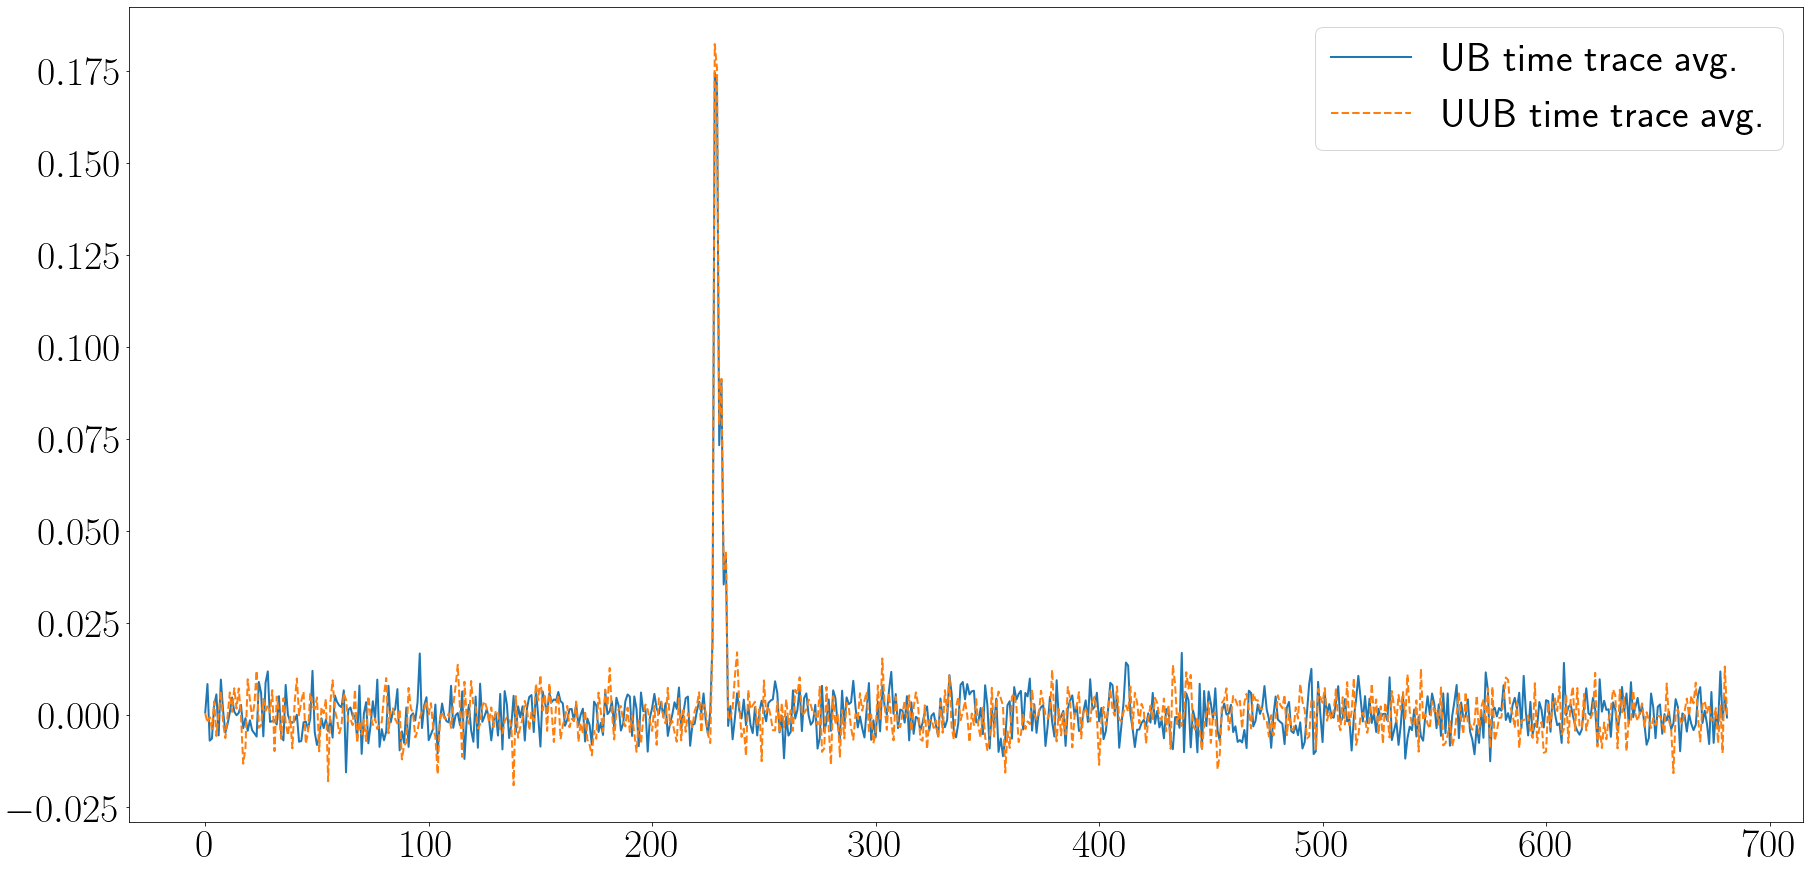

In [6]:
from Binaries import *

EventsUB = EventGenerator("/cr/tempdata01/filip/QGSJET-II/DOWNSAMPLING/UB/", is_vem = True, split = 1, real_background = False, trace_length = 682)
EventsUUB = EventGenerator("/cr/tempdata01/filip/QGSJET-II/DOWNSAMPLING/UUB/", split = 1, real_background = False, trace_length = 2048, apply_downsampling = True)
tracesUB = EventsUB.__getitem__(0)
tracesUUB = EventsUB.__getitem__(0)

for UB, UUB in zip(tracesUB, tracesUUB):
    plt.figure()
    plt.plot(range(682), 1/3 * (UB.pmt_1 + UB.pmt_2 + UB.pmt_3), label = "UB time trace avg.", lw = 2)
    plt.plot(range(682), 1/3 * (UUB.pmt_1 + UUB.pmt_2 + UUB.pmt_3), label = "UUB time trace avg.", ls = "--", lw = 2)

    plt.legend()